In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [7]:
class plot_diagram():
    # Constructor: Plots the cost surface (loss vs parameter values)
    def __init__(self, X, Y, w, stop):
        start = w.item()  # Use scalar
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        
        # Precompute loss for a range of w values (the "cost surface")
        self.parameter_values = torch.arange(start, stop + 0.1, 0.1)  # Fine grid
        def temp_forward(x, param): return param * x
        self.Loss_function = [torch.mean((temp_forward(X, param) - Y)**2).item() 
                              for param in self.parameter_values]
        
        w.data = torch.tensor(start)  # Reset
        
    # Call: Updates live plots during training
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.item())
        
        # Bottom: Data and current prediction
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy(), label='Prediction')
        plt.plot(self.X, self.Y, 'ro', label='Data')
        plt.xlabel("x")
        plt.ylim(-20, 20)
        plt.legend()
        
        # Top: Cost surface + path of w during training
        plt.subplot(211)
        plt.title(f"Iteration {n}")
        plt.plot(self.parameter_values.numpy(), self.Loss_function, label='Cost Surface')
        plt.plot(self.parameter, self.error, 'ro', label='Training Path')
        plt.xlabel("w (slope)")
        plt.ylabel("Loss")
        plt.legend()
        
        plt.tight_layout()
        plt.pause(0.5)  # Brief pause to see animation (or use plt.show() in notebook)
    
    def __del__(self):
        plt.close('all')

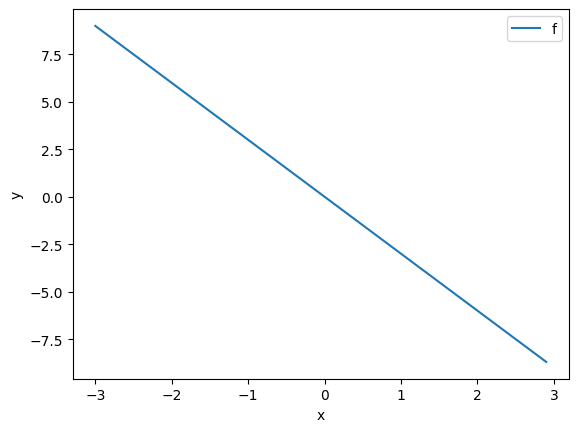

In [12]:
# True function: slope = -3
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

plt.plot(X.numpy(), f.numpy(), label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

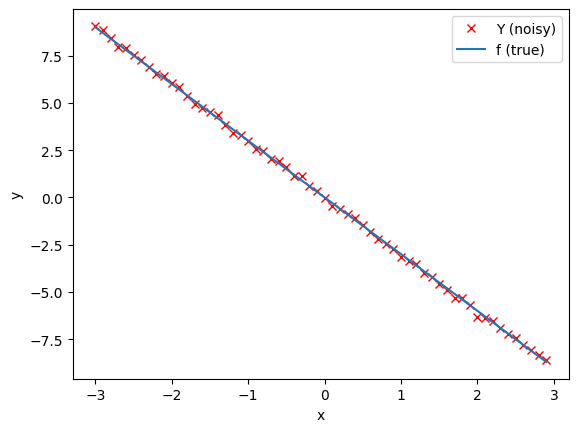

In [13]:
# Add noise to create training targets
Y = f + 0.1 * torch.randn(X.size())

plt.plot(X.numpy(), Y.numpy(), 'rx', label='Y (noisy)')
plt.plot(X.numpy(), f.numpy(), label='f (true)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Train model

In [14]:
# One learnable parameter: w (slope), starting far away
w = torch.tensor(-10.0, requires_grad=True)

# Learning rate
lr = 0.1

# List to store loss history
LOSS = []

# Create plotter (cost surface from w=-10 to w=5)
gradient_plot = plot_diagram(X, Y, w, stop=5)

# Define forward and criterion as simple functions
def forward(x):
    return w * x

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

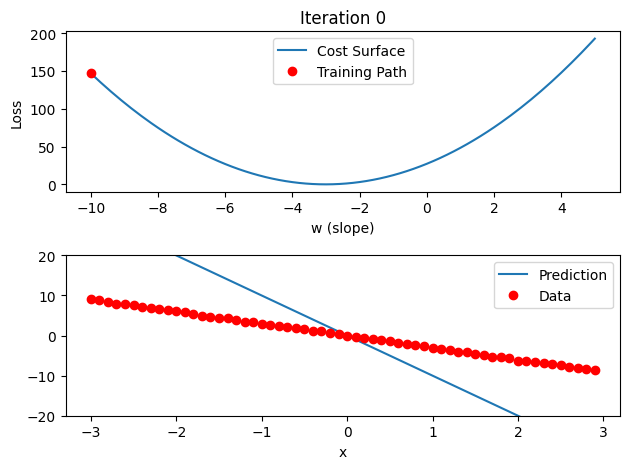

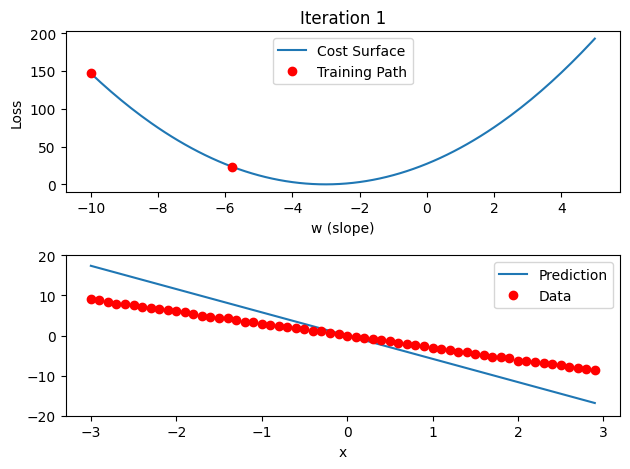

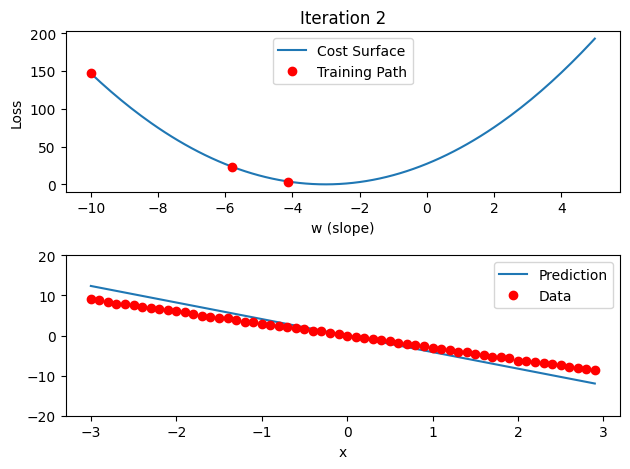

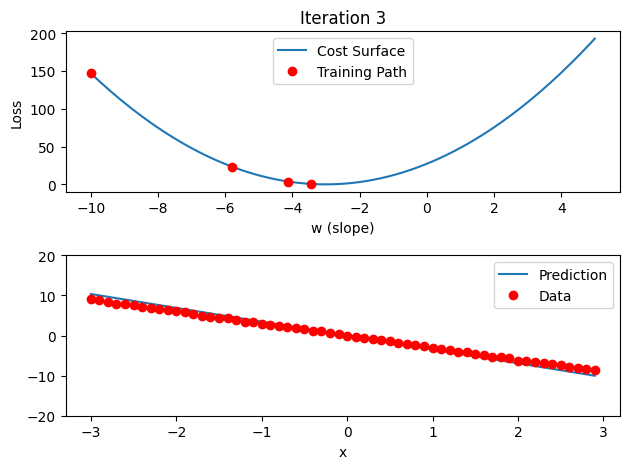

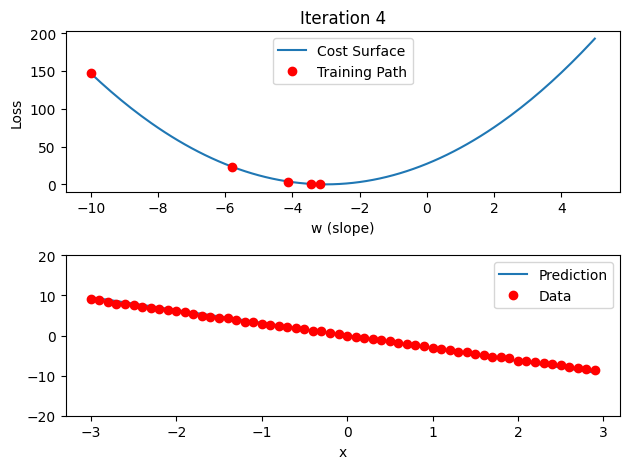

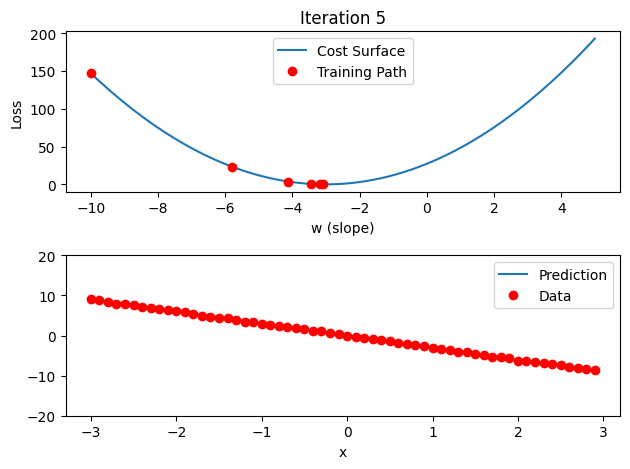

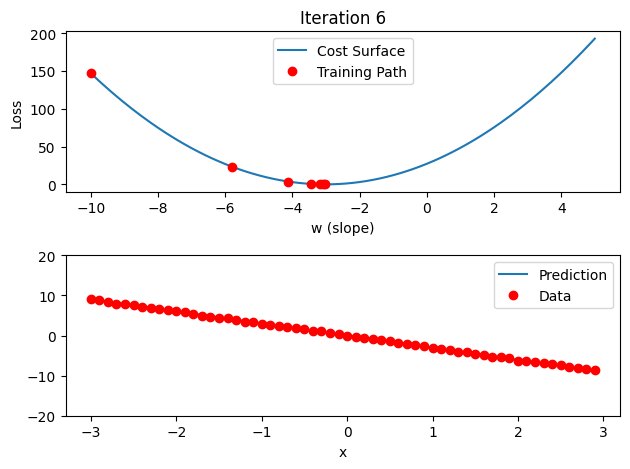

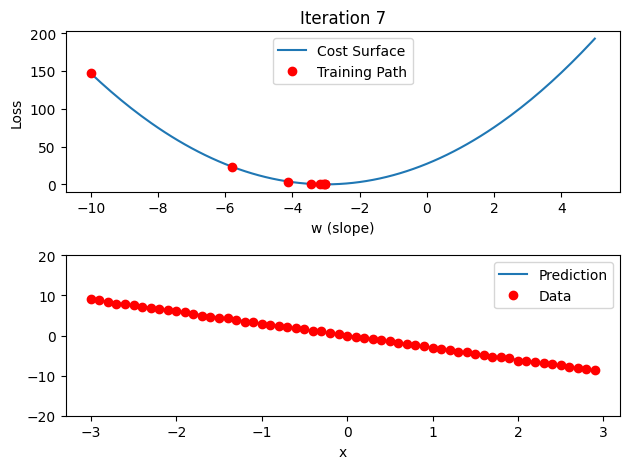

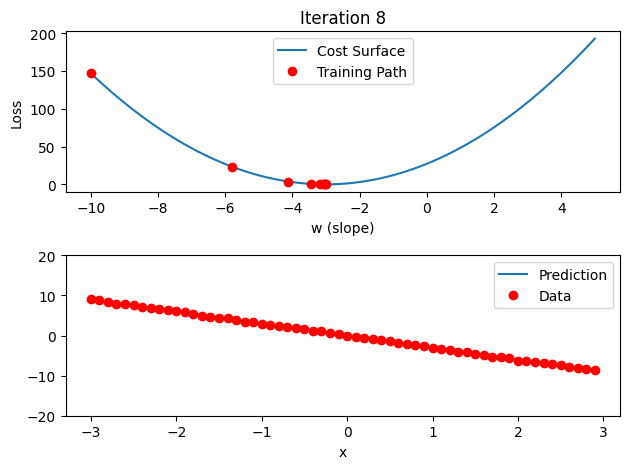

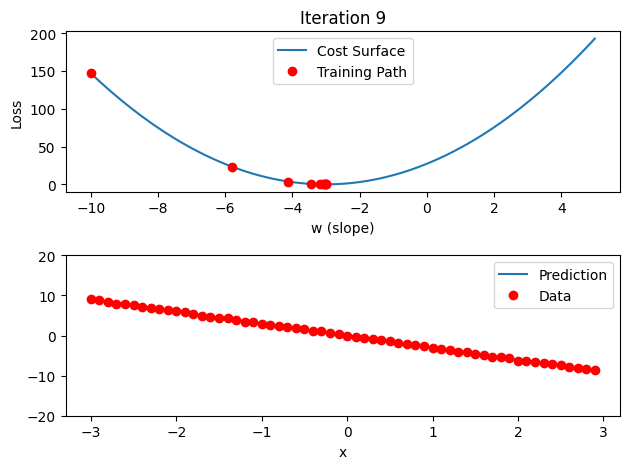

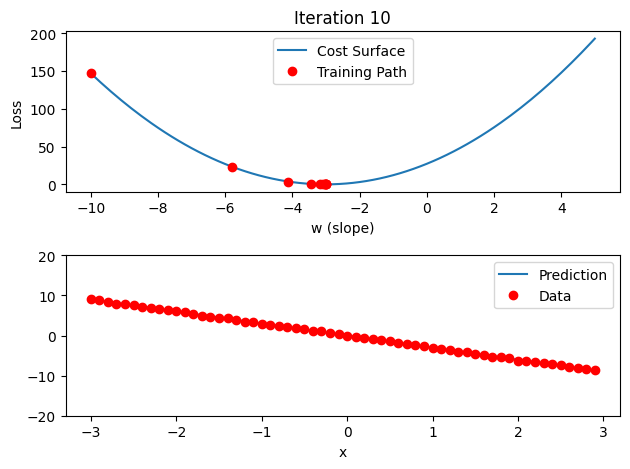

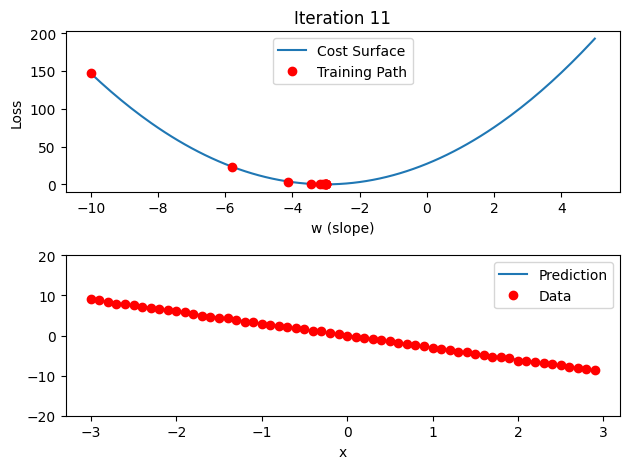

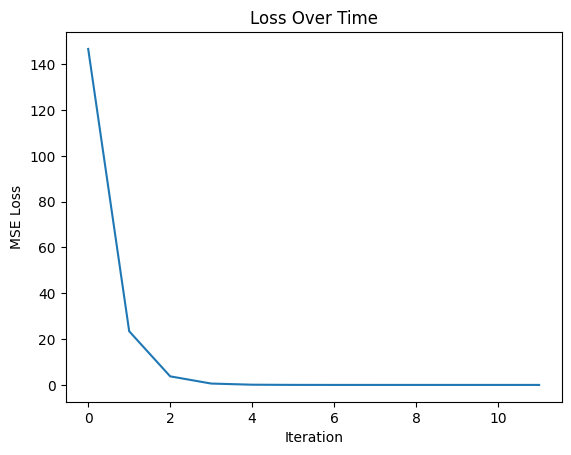

Final learned w: -3.0098 (true slope was -3)


In [15]:
# Train the model manually
def train_model(iterations):
    for epoch in range(iterations):
        # Forward pass
        Yhat = forward(X)
        
        # Loss (MSE)
        loss = criterion(Yhat, Y)
        
        # Plot update
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        # Store loss
        LOSS.append(loss.item())
        
        # Backward pass (autograd computes dw/dloss)
        loss.backward()
        
        # Update w manually (gradient descent step)
        w.data = w.data - lr * w.grad.data
        
        # Zero gradients
        w.grad.data.zero_()

# Train for 10-15 iterations to see convergence (4 was too few to reach bottom)
train_model(12)

# Final loss curve
plt.figure()
plt.plot(LOSS)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Loss Over Time")
plt.show()

print(f"Final learned w: {w.item():.4f} (true slope was -3)")